<a href="https://colab.research.google.com/github/siranjeevi21/Disease-prediction/blob/main/Covid19_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
import cv2
import os
from random import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob as gb
from tensorflow.keras.utils import to_categorical

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
my_data_path = "/content/drive/MyDrive/Data"
train_path = "/content/drive/MyDrive/Data/train"
test_path = "/content/drive/MyDrive/Data/test"

In [6]:
image_shape = (100,100,1)
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [7]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline

In [8]:
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0

In [10]:
early_stop = EarlyStopping(monitor='val_loss',patience=2, verbose = 1)
batch_size = 64

train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(100,100),
                                                color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 7095 images belonging to 3 classes.


In [11]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=(100,100),
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 1324 images belonging to 3 classes.


In [15]:
print(train_image_gen.class_indices)
print(test_image_gen.class_indices)

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}
{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}


In [12]:
results = model.fit(train_image_gen,epochs=5,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/5
111/111 [==============================] - 2346s 21s/step - loss: 0.7694 - accuracy: 0.7053 - val_loss: 0.5216 - val_accuracy: 0.7092
Epoch 2/5
111/111 [==============================] - 487s 4s/step - loss: 0.4841 - accuracy: 0.7967 - val_loss: 0.4403 - val_accuracy: 0.8104
Epoch 3/5
111/111 [==============================] - 479s 4s/step - loss: 0.4385 - accuracy: 0.8197 - val_loss: 0.4026 - val_accuracy: 0.8474
Epoch 4/5
111/111 [==============================] - 480s 4s/step - loss: 0.3854 - accuracy: 0.8473 - val_loss: 0.3221 - val_accuracy: 0.8784
Epoch 5/5
111/111 [==============================] - 482s 4s/step - loss: 0.3947 - accuracy: 0.8503 - val_loss: 0.3679 - val_accuracy: 0.8467


In [13]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.681921,0.735307,0.521625,0.709215
1,0.478530,0.799013,0.440285,0.810423
2,0.421445,0.829739,0.402646,0.847432
3,0.392355,0.846653,0.322058,0.878399
4,0.379839,0.857223,0.367881,0.846677


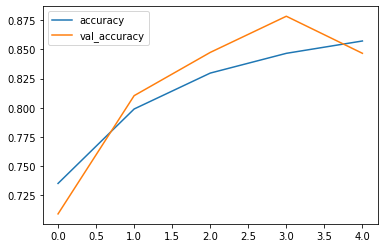

In [14]:
loss_df[['accuracy', 'val_accuracy']].plot()

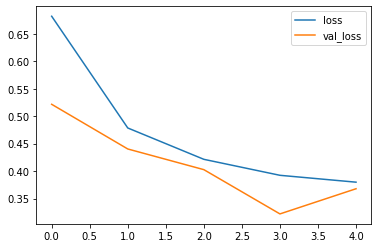

In [15]:
loss_df[['loss', 'val_loss']].plot()

In [16]:
model.evaluate(test_image_gen)

21/21 [==============================] - 47s 2s/step - loss: 0.3575 - accuracy: 0.8557


[0.3574584126472473, 0.8557401895523071]

In [17]:
predictions = np.argmax(model.predict(test_image_gen), axis = -1)
predictions

array([1, 0, 0, ..., 2, 2, 2])

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       116
           1       0.75      0.71      0.73       351
           2       0.87      0.91      0.89       857

    accuracy                           0.84      1324
   macro avg       0.84      0.78      0.81      1324
weighted avg       0.84      0.84      0.84      1324



[[ 83  18  15]
 [  2 250  99]
 [  7  66 784]]


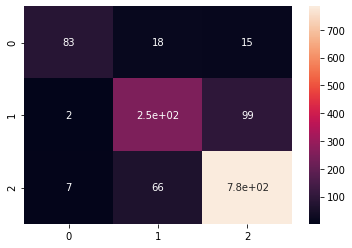

In [19]:
print(confusion_matrix(test_image_gen.classes,predictions))
sns.heatmap(confusion_matrix(test_image_gen.classes,predictions), annot = True)

In [20]:
model.save('modelCovid19.h5')